<a href="https://colab.research.google.com/github/Collins-nnaji/Data_Science/blob/main/Project_7_ClothingReviews_SentimentAnalysis_SupportVectorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from io import IncrementalNewlineDecoder
%matplotlib inline

import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report


#Text Processing
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer


import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [ ]:
#Drop Unwanted featured
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#Remove every row in the dataframe containing missing data
df.dropna(axis=0, inplace=True)

In [ ]:
#confirming we do not have missing values anymore
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
df.rename(columns = {'Clothing ID':'Clothing_ID','Review Text':'Review_Text','Positive Feedback Count': 'Feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended'},inplace =True)

In [ ]:
#FILTER DATA TO CHECK CONSISTENCY WITH RATING RANGE AND RECOMMENDATION
df[(df['Rating']>2) & (df['Recommended'] == 1)]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended,Feedback_count,Division,Department,Class,Review_tokens,Review_stemmed,Review_lemmatized,Rejoined,Sentiment_Polarity,Sentiment,noun_phrases
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[I, love, ,, love, ,, love, jumpsuit, ., 's, f...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f...","I love , love , love jumpsuit . 's fun , flirt...",0.550000,positive,"['s fun, time i, great compliments]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[This, shirt, flattering, due, adjustable, fro...","[thi, shirt, flatter, due, adjust, front, tie,...","[This, shirt, flattering, due, adjustable, fro...",This shirt flattering due adjustable front tie...,0.512891,positive,"[adjustable front tie, perfect length]"
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[I, aded, basket, hte, last, mintue, see, woul...","[i, ade, basket, hte, last, mintu, see, would,...","[I, aded, basket, hte, last, mintue, see, woul...",I aded basket hte last mintue see would look l...,0.133750,positive,"[teh darkler color, hte color, hte xs, hte msa..."
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"[I, ordered, carbon, store, pick, ,, ton, stuf...","[i, order, carbon, store, pick, ,, ton, stuff,...","[I, ordered, carbon, store, pick, ,, ton, stuf...","I ordered carbon store pick , ton stuff ( alwa...",0.171635,positive,"[nice charcoal, pencil skirts, flare pants, xx..."
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,"[I, love, dress, ., usually, get, xs, runs, li...","[i, love, dress, ., usual, get, xs, run, littl...","[I, love, dress, ., usually, get, x, run, litt...",I love dress . usually get x run little snug b...,0.002500,positive,[usual retailer flair]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts,"[So, n't, sure, ordering, skirt, could, n't, s...","[so, n't, sure, order, skirt, could, n't, see,...","[So, n't, sure, ordering, skirt, could, n't, s...",So n't sure ordering skirt could n't see perso...,0.211136,positive,"[i 'm, glad i, n't look, pale skin, daughter '..."
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[I, happy, snag, dress, great, price, !, 's, e...","[i, happi, snag, dress, great, price, !, 's, e...","[I, happy, snag, dress, great, price, !, 's, e...",I happy snag dress great price ! 's easy slip ...,0.552667,positive,"[great price, color combo]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[It, reminds, maternity, clothes, ., soft, ,, ...","[it, remind, matern, cloth, ., soft, ,, stretc...","[It, reminds, maternity, clothes, ., soft, ,, ...","It reminds maternity clothes . soft , stretchy...",0.091667,positive,"[maternity clothes, shiny material, front ...]"
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[I, bought, dress, wedding, summer, ,, 's, cut...","[i, bought, dress, wed, summer, ,, 's, cute, ....","[I, bought, dress, wedding, summer, ,, 's, cut...","I bought dress wedding summer , 's cute . unfo...",0.322222,positive,"[wedding i, side note, nordstrom tag]"


In [ ]:
df[(df['Rating']>2) & (df['Recommended'] == 0)]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended,Feedback_count,Division,Department,Class,Review_tokens,Review_stemmed,Review_lemmatized,Rejoined,Sentiment_Polarity,Sentiment,noun_phrases
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[I, high, hopes, dress, really, wanted, work, ...","[i, high, hope, dress, realli, want, work, ., ...","[I, high, hope, dress, really, wanted, work, ....",I high hope dress really wanted work . initial...,0.073675,positive,"[such high hopes, usual size, petite medium, o..."
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,"[Dress, runs, small, esp, zipper, area, runs, ...","[dress, run, small, esp, zipper, area, run, .,...","[Dress, run, small, esp, zipper, area, run, .,...",Dress run small esp zipper area run . ordered ...,-0.097149,negative,"[dress, small esp, zipper area runs, christmas..."
25,697,31,Falls flat,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,"[Loved, material, ,, didnt, really, look, long...","[love, materi, ,, didnt, realli, look, long, d...","[Loved, material, ,, didnt, really, look, long...","Loved material , didnt really look long dress ...",0.261508,positive,"[loved, i didnt]"
57,862,31,"Boring front, great back",This tank fit well and i loved the ruffle in t...,3,0,0,General,Tops,Knits,"[This, tank, fit, well, loved, ruffle, back, l...","[thi, tank, fit, well, love, ruffl, back, lay,...","[This, tank, fit, well, loved, ruffle, back, l...",This tank fit well loved ruffle back layed . f...,0.187500,positive,[good look]
69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses,"[I, really, wanted, work, ., alas, ,, strange,...","[i, realli, want, work, ., ala, ,, strang, fit...","[I, really, wanted, work, ., ala, ,, strange, ...","I really wanted work . ala , strange fit . str...",0.177160,positive,[minute i]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23436,1104,53,Short; more of an empire waist than photo shows,"I'm 5'6"" and it hits me at mid-thigh. the top ...",3,0,5,General Petite,Dresses,Dresses,"[I, 'm, 5, ', 6, '', hits, mid-thigh, ., top, ...","[i, 'm, 5, ', 6, '', hit, mid-thigh, ., top, (...","[I, 'm, 5, ', 6, '', hit, mid-thigh, ., top, (...",I 'm 5 ' 6 '' hit mid-thigh . top ( black/came...,0.165000,positive,"[black/camel version, empire waist, bit pregnant]"
23447,1104,28,Fit weird,I really wanted to like this dress and was enc...,3,0,1,General Petite,Dresses,Dresses,"[I, really, wanted, like, dress, encouraged, p...","[i, realli, want, like, dress, encourag, posit...","[I, really, wanted, like, dress, encouraged, p...",I really wanted like dress encouraged positive...,0.256753,positive,"[positive reviews, top fabric, ribs funny]"
23449,262,39,Not for me,I tried these on because the color is really p...,3,0,7,General Petite,Intimate,Lounge,"[I, tried, color, really, pretty, fun, ,, dons...","[i, tri, color, realli, pretti, fun, ,, donse'...","[I, tried, color, really, pretty, fun, ,, dons...","I tried color really pretty fun , donse't want...",-0.039583,negative,"[comfy/cute pants ..., muscular thighs ... i, ..."
23460,1078,34,Such high hopes!,I purchased this for a very good price and i t...,3,0,0,General,Dresses,Dresses,"[I, purchased, good, price, typically, love, m...","[i, purchas, good, price, typic, love, maev, ....","[I, purchased, good, price, typically, love, m...",I purchased good price typically love maeve .....,0.100370,positive,"[good price, maeve ..., unfortunate way, appro..."


In [ ]:
#VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count of Clothing Class')

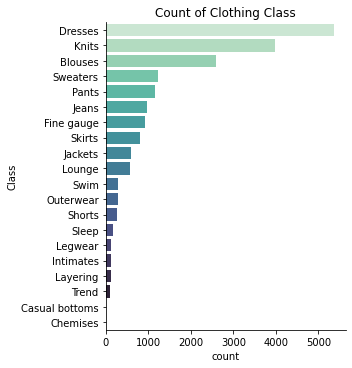

In [ ]:
#COUNT PLOT FOR CLASS
sns.catplot(data=df, kind='count', y='Class', palette='mako_r',
            order=df['Class'].value_counts(ascending=False).index)
plt.title("Count of Clothing Class")

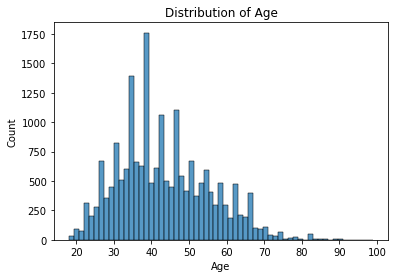

In [ ]:
#HISTOGRAM FOR AGE
plt.figure()
sns.histplot(df["Age"])
plt.title("Distribution of Age")
plt.show()

In [ ]:
#Average Rating by Department
Rating_average = df.groupby("Department")["Rating"].mean()
print(Rating_average)

Department
Bottoms     4.287688
Dresses     4.137032
Intimate    4.257812
Jackets     4.270762
Tops        4.156433
Trend       3.859813
Name: Rating, dtype: float64


In [ ]:
#Feedback count by Department
Sum_Feedback_count = df.groupby("Department")["Feedback_count"].sum()
print(Sum_Feedback_count)

Department
Bottoms      7071
Dresses     17092
Intimate     2873
Jackets      2518
Tops        22259
Trend         340
Name: Feedback_count, dtype: int64


In [ ]:
#Count the number of unique words in the reviews
word_count = df["Review_Text"].apply(lambda x: len(x.split()))
print(word_count)

2         98
3         22
4         36
5         98
6        101
        ... 
23481     28
23482     38
23483     42
23484     86
23485     19
Name: Review_Text, Length: 19662, dtype: int64


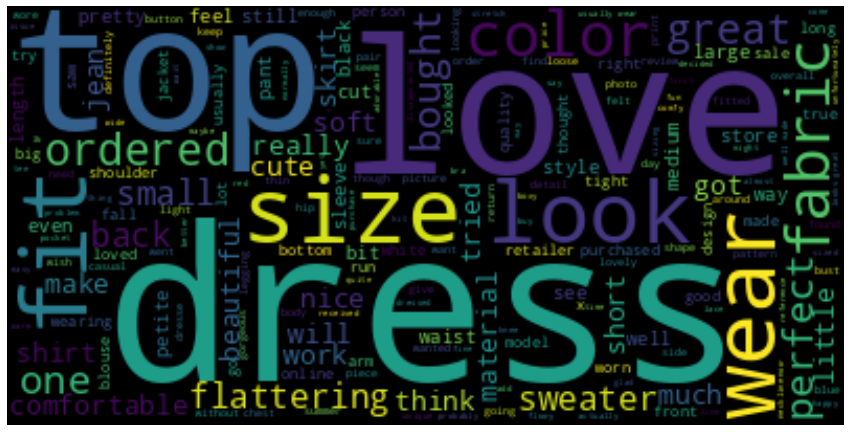

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#create a list of all the review text
Review_Text = df['Review_Text'].tolist()

#combine all the review text into one string
All_Reviews = " ".join(Review_Text)

#generate wordcloud
wordcloud1 = WordCloud().generate(All_Reviews)

#display wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


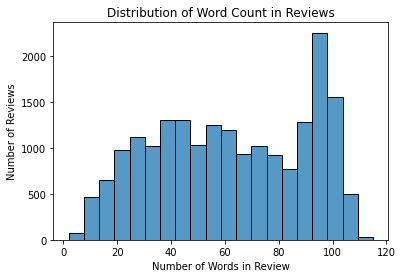

In [ ]:
#Plot the word count distribution using a histogram
sns.histplot(word_count, bins=20)
plt.xlabel("Number of Words in Review")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Word Count in Reviews")
plt.show()

Text(0.5, 1.0, 'Distribution of Ratings')

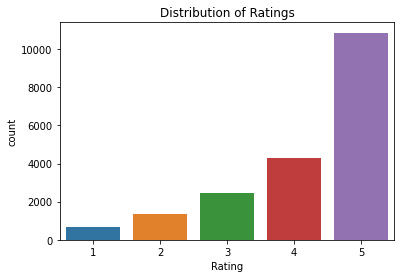

In [ ]:
## Frequency distribution of Rating
sns.countplot(x='Rating',data=df)
plt.title("Distribution of Ratings")

<Axes: title={'center': 'Top 50 Most Reviewd Items'}, xlabel='Clothing ID', ylabel='Frequency'>

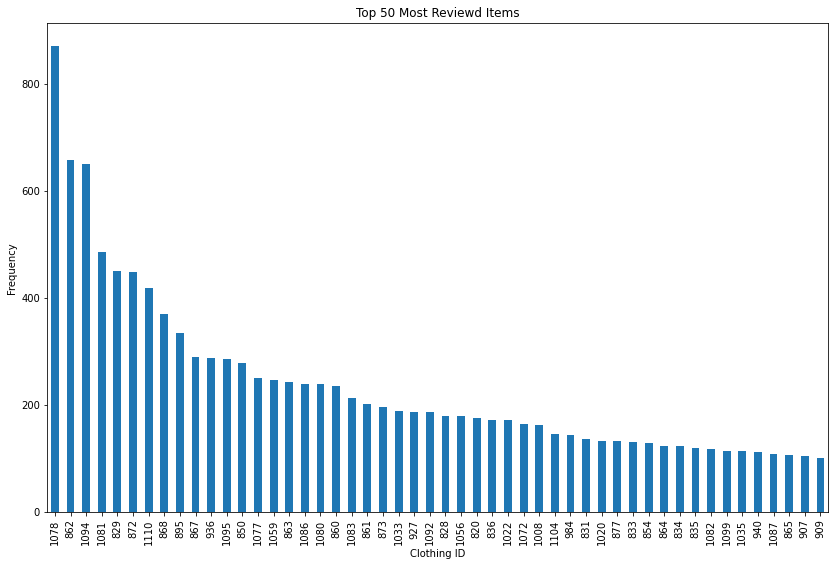

In [ ]:
#Top 50 Most Popular items
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('Clothing ID')
plt.ylabel('Frequency')
plt.title("Top 50 Most Reviewd Items")
df['Clothing_ID'].value_counts()[:50].plot(kind='bar')

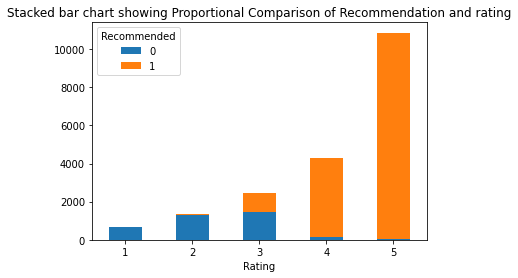

In [ ]:
#STACKED PLOT RECOMMENDATION BY RATING
df_grouped1 = df.groupby('Rating')['Recommended'].value_counts().unstack()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
df_grouped1.plot.bar(color=colors, stacked=True)
plt.title("Stacked bar chart showing Proportional Comparison of Recommendation and rating")
plt.xticks(rotation=0)
plt.show()


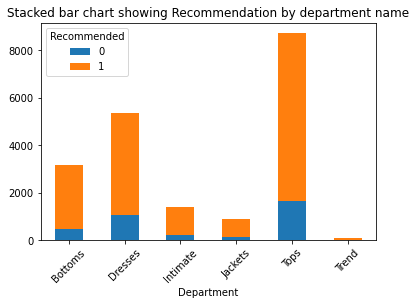

In [ ]:
#STACKED PLOT OF RECOMMENDATION BY DEPARTMENT NAME
df_grouped2 = df.groupby('Department')['Recommended'].value_counts().unstack()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
df_grouped2.plot.bar(color=colors, stacked=True)
plt.title("Stacked bar chart showing Recommendation by department name")
plt.xticks(rotation=45)
plt.show()

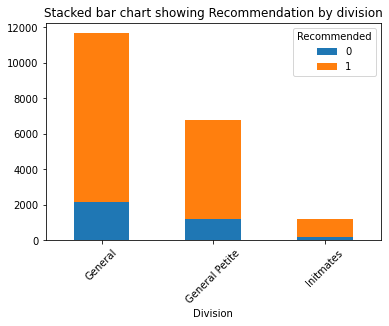

In [ ]:
#STACKED PLOTS FOR RECOMMENDATION PER DIVISION
df_grouped3 = df.groupby('Division')['Recommended'].value_counts().unstack()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
df_grouped3.plot.bar(color=colors, stacked=True)
plt.title("Stacked bar chart showing Recommendation by division")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Review_length'] = df['Review_Text'].apply(len)
Average_review_length = df['Review_length'].mean()
print(Average_review_length)

318.4448174143017


In [ ]:
#Text Processing

In [ ]:
df.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating', 'Recommended',
       'Feedback_count', 'Division', 'Department', 'Class'],
      dtype='object')

In [ ]:
from nltk.corpus.reader.reviews import Review
Review = df['Review_Text']

In [ ]:
#STEP 1: Tokenization
#Text Processing
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
df["Review_tokens"] = Review.apply(nltk.word_tokenize)

In [ ]:
print(df["Review_tokens"].head())

2    [I, had, such, high, hopes, for, this, dress, ...
3    [I, love, ,, love, ,, love, this, jumpsuit, .,...
4    [This, shirt, is, very, flattering, to, all, d...
5    [I, love, tracy, reese, dresses, ,, but, this,...
6    [I, aded, this, in, my, basket, at, hte, last,...
Name: Review_tokens, dtype: object


In [ ]:
#STEP 2
#STOPWORD REMOVAL
stop_words = stopwords.words("english")
df["Review_tokens"] = df["Review_tokens"].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
print(df["Review_tokens"].head())

2    [I, high, hopes, dress, really, wanted, work, ...
3    [I, love, ,, love, ,, love, jumpsuit, ., 's, f...
4    [This, shirt, flattering, due, adjustable, fro...
5    [I, love, tracy, reese, dresses, ,, one, petit...
6    [I, aded, basket, hte, last, mintue, see, woul...
Name: Review_tokens, dtype: object


In [ ]:
#STEP 3
#LEXICON NORMALIZATION (STEMMING AND LEMMATIZATION)
stemmer = PorterStemmer()
df['Review_stemmed'] = df['Review_tokens'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
print(df["Review_stemmed"].head(10))

2     [i, high, hope, dress, realli, want, work, ., ...
3     [i, love, ,, love, ,, love, jumpsuit, ., 's, f...
4     [thi, shirt, flatter, due, adjust, front, tie,...
5     [i, love, traci, rees, dress, ,, one, petit, ....
6     [i, ade, basket, hte, last, mintu, see, would,...
7     [i, order, carbon, store, pick, ,, ton, stuff,...
8     [i, love, dress, ., usual, get, xs, run, littl...
9     [i, 'm, 5, '', 5, ', 125, lb, ., order, petit,...
10    [dress, run, small, esp, zipper, area, run, .,...
12    [more, find, reliant, review, written, savvi, ...
Name: Review_stemmed, dtype: object


In [ ]:
lemmatizer = WordNetLemmatizer()
#lemmatize each word in the tokenized review column
df['Review_lemmatized'] = df['Review_stemmed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
print(df["Review_lemmatized"].head(10))

2     [i, high, hope, dress, realli, want, work, ., ...
3     [i, love, ,, love, ,, love, jumpsuit, ., 's, f...
4     [thi, shirt, flatter, due, adjust, front, tie,...
5     [i, love, traci, rees, dress, ,, one, petit, ....
6     [i, ade, basket, hte, last, mintu, see, would,...
7     [i, order, carbon, store, pick, ,, ton, stuff,...
8     [i, love, dress, ., usual, get, x, run, littl,...
9     [i, 'm, 5, '', 5, ', 125, lb, ., order, petit,...
10    [dress, run, small, esp, zipper, area, run, .,...
12    [more, find, reliant, review, written, savvi, ...
Name: Review_lemmatized, dtype: object


In [ ]:
lemmatizer = WordNetLemmatizer()

#lemmatize each word in the tokenized review column
df['Review_lemmatized'] = df['Review_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
print(df["Review_lemmatized"].head(10))

2     [I, high, hope, dress, really, wanted, work, ....
3     [I, love, ,, love, ,, love, jumpsuit, ., 's, f...
4     [This, shirt, flattering, due, adjustable, fro...
5     [I, love, tracy, reese, dress, ,, one, petite,...
6     [I, aded, basket, hte, last, mintue, see, woul...
7     [I, ordered, carbon, store, pick, ,, ton, stuf...
8     [I, love, dress, ., usually, get, x, run, litt...
9     [I, 'm, 5, '', 5, ', 125, lb, ., ordered, peti...
10    [Dress, run, small, esp, zipper, area, run, .,...
12    [More, find, reliant, review, written, savvy, ...
Name: Review_lemmatized, dtype: object


In [ ]:
#STEP 4:REJOIN WORDS
def rejoin_words(Review_lemmatized):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(Review_lemmatized))

In [ ]:
df['Rejoined'] = df.apply(lambda x: rejoin_words(x['Review_lemmatized']), axis=1)
df[['Review_Text', 'Rejoined']].head(15)

,Review_Text,Rejoined
2,I had such high hopes for this dress and reall...,I high hope dress really wanted work . initial...
3,"I love, love, love this jumpsuit. it's fun, fl...","I love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,This shirt flattering due adjustable front tie...
5,"I love tracy reese dresses, but this one is no...","I love tracy reese dress , one petite . 5 foot..."
6,I aded this in my basket at hte last mintue to...,I aded basket hte last mintue see would look l...
7,"I ordered this in carbon for store pick up, an...","I ordered carbon store pick , ton stuff ( alwa..."
8,I love this dress. i usually get an xs but it ...,I love dress . usually get x run little snug b...
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",I 'm 5 '' 5 ' 125 lb . ordered petite make sur...
10,Dress runs small esp where the zipper area run...,Dress run small esp zipper area run . ordered ...
12,More and more i find myself reliant on the rev...,More find reliant review written savvy shopper...


In [ ]:
df['Rejoined'].head(10)

2     I high hope dress really wanted work . initial...
3     I love , love , love jumpsuit . 's fun , flirt...
4     This shirt flattering due adjustable front tie...
5     I love tracy reese dress , one petite . 5 foot...
6     I aded basket hte last mintue see would look l...
7     I ordered carbon store pick , ton stuff ( alwa...
8     I love dress . usually get x run little snug b...
9     I 'm 5 '' 5 ' 125 lb . ordered petite make sur...
10    Dress run small esp zipper area run . ordered ...
12    More find reliant review written savvy shopper...
Name: Rejoined, dtype: object

In [ ]:
#SEBTIMENT ANALYSIS USING TEXTBLOB
!pip install textblob
from textblob import TextBlob

In [ ]:
def sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['Sentiment_Polarity'] = df['Review_Text'].apply(sentiment_polarity)

In [ ]:
def sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Sentiment_Polarity'].apply(sentiment_label)

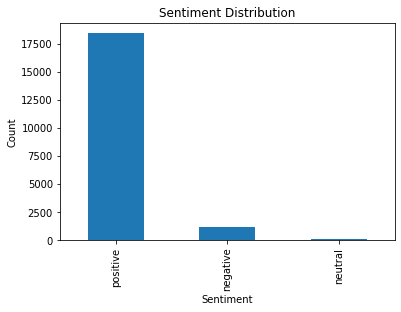

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


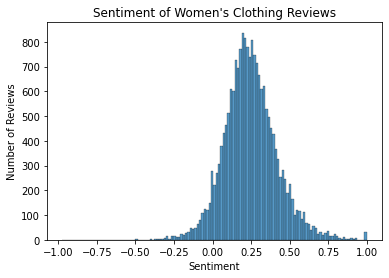

In [ ]:
df['sentiment2'] = df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#Plot the distribution of sentiment using a histogram
sns.histplot(df['sentiment2'])
plt.title("Sentiment of Women's Clothing Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Assuming the DataFrame is named 'df' and the review text column is named 'Review_Text'
# Create a new column to hold the noun phrases for each review
df['noun_phrases'] = df['Review_Text'].apply(lambda x: TextBlob(x).noun_phrases)

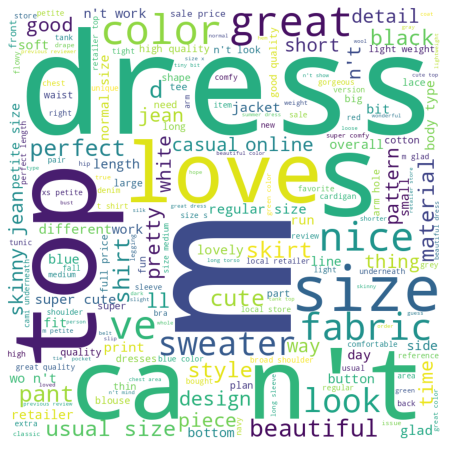

In [ ]:
# Wordcloud for noun phrase
# Concatenate all the noun phrases into a single string
noun_phrases_string = ' '.join(df['noun_phrases'].str.join(' '))

# Create and display the word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(noun_phrases_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Training Accuracy:  0.9327992879394749
Testing Accuracy:  0.901347571828121
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       700
           1       0.92      0.96      0.94      3233

    accuracy                           0.90      3933
   macro avg       0.85      0.80      0.82      3933
weighted avg       0.90      0.90      0.90      3933



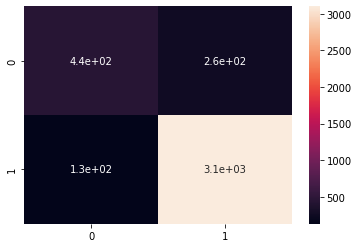

In [ ]:
#SVM MODEL WITHOUT HYPERPARAMETER TUNING

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report

#Create the word2vec model
vectorizer = TfidfVectorizer()
wordvec = vectorizer.fit_transform(df['Rejoined'])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wordvec, df['Recommended'], test_size=0.2, random_state=42)

#Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


# Test the model on the training data
train_predictions = model.predict(X_train)
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)

# Test the model on the testing data
test_predictions = model.predict(X_test)
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy: ", test_accuracy)

# View the confusion matrix for the testing data
test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True)

# View the classification report for the testing data
class_report = classification_report(y_test, test_predictions)
print(class_report)


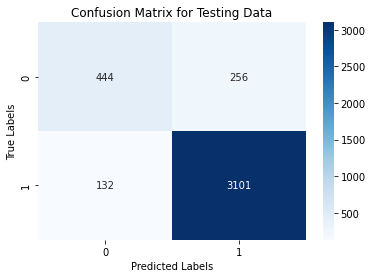

In [ ]:
# Visualize the confusion matrix using a heatmap with actual values
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Training time (seconds): 4158.016766548157
Testing Accuracy:  0.901347571828121
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       700
           1       0.92      0.96      0.94      3233

    accuracy                           0.90      3933
   macro avg       0.85      0.80      0.82      3933
weighted avg       0.90      0.90      0.90      3933



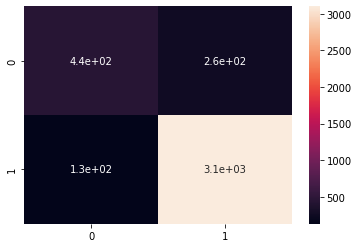

In [ ]:
#SVM MODEL WITH HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
import time

# Define the SVM model
svm = SVC()

# Define the hyperparameters to tune
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object with the SVM model and hyperparameters
grid_search = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data and measure the training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Print the best hyperparameters and the training time
print("Best hyperparameters:", grid_search.best_params_)
print("Training time (seconds):", training_time)

# Test the model on the testing data
test_predictions = grid_search.predict(X_test)
test_accuracy = grid_search.score(X_test, y_test)
print("Testing Accuracy: ", test_accuracy)

# View the confusion matrix for the testing data
test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True)

# View the classification report for the testing data
class_report = classification_report(y_test, test_predictions)
print(class_report)


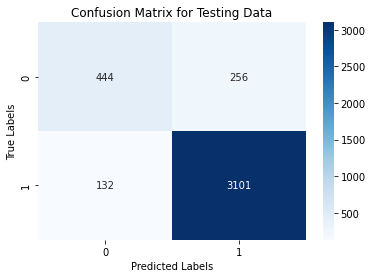

In [ ]:
# Visualize the confusion matrix using a heatmap with actual values
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Training time (seconds): 2391.2174365520477
Testing Accuracy:  0.8929090380703284
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1313
           1       0.91      0.96      0.94      5569

    accuracy                           0.89      6882
   macro avg       0.85      0.78      0.81      6882
weighted avg       0.89      0.89      0.89      6882



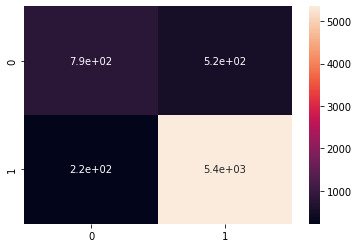

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report

#Create the word2vec model
vectorizer = TfidfVectorizer()
wordvec = vectorizer.fit_transform(df['Rejoined'])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wordvec, df['Recommended'], test_size=0.35, random_state=42)

# Define the SVM model
svm = SVC()

# Define the hyperparameters to tune
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object with the SVM model and hyperparameters
grid_search = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data and measure the training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Print the best hyperparameters and the training time
print("Best hyperparameters:", grid_search.best_params_)
print("Training time (seconds):", training_time)

# Test the model on the testing data
test_predictions = grid_search.predict(X_test)
test_accuracy = grid_search.score(X_test, y_test)
print("Testing Accuracy: ", test_accuracy)

# View the confusion matrix for the testing data
test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True)

# View the classification report for the testing data
class_report = classification_report(y_test, test_predictions)
print(class_report)


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Training time (seconds): 4731.171914577484
Testing Accuracy:  0.9016949152542373
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       515
           1       0.93      0.96      0.94      2435

    accuracy                           0.90      2950
   macro avg       0.84      0.80      0.82      2950
weighted avg       0.90      0.90      0.90      2950



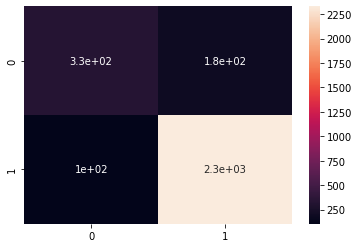

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wordvec, df['Recommended'], test_size=0.15, random_state=42)

# Define the SVM model
svm = SVC()

# Define the hyperparameters to tune
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object with the SVM model and hyperparameters
grid_search = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data and measure the training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Print the best hyperparameters and the training time
print("Best hyperparameters:", grid_search.best_params_)
print("Training time (seconds):", training_time)

# Test the model on the testing data
test_predictions = grid_search.predict(X_test)
test_accuracy = grid_search.score(X_test, y_test)
print("Testing Accuracy: ", test_accuracy)

# View the confusion matrix for the testing data
test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True)

# View the classification report for the testing data
class_report = classification_report(y_test, test_predictions)
print(class_report)


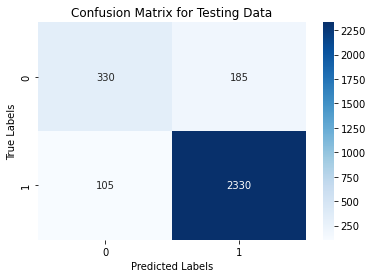

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69       515
           1       0.93      0.96      0.94      2435

    accuracy                           0.90      2950
   macro avg       0.84      0.80      0.82      2950
weighted avg       0.90      0.90      0.90      2950



In [ ]:
# View the confusion matrix for the testing data
test_cm = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(test_cm, columns=np.unique(y_test), index=np.unique(y_test))
cm_df.index.name = 'True Labels'
cm_df.columns.name = 'Predicted Labels'
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Testing Data")
plt.show()

# View the classification report for the testing data
class_report = classification_report(y_test, test_predictions)
print("Classification Report for Testing Data:\n", class_report)


In [ ]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended,Feedback_count,Division,Department,Class,Review_tokens,Review_stemmed,Review_lemmatized,Rejoined,Sentiment_Polarity,Sentiment,noun_phrases,Review_length,sentiment2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[I, high, hopes, dress, really, wanted, work, ...","[i, high, hope, dress, realli, want, work, ., ...","[I, high, hope, dress, really, wanted, work, ....",I high hope dress really wanted work . initial...,0.073675,positive,"[such high hopes, usual size, petite medium, o...",500,0.073675
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[I, love, ,, love, ,, love, jumpsuit, ., 's, f...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f...","I love , love , love jumpsuit . 's fun , flirt...",0.550000,positive,"['s fun, time i, great compliments]",124,0.550000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[This, shirt, flattering, due, adjustable, fro...","[thi, shirt, flatter, due, adjust, front, tie,...","[This, shirt, flattering, due, adjustable, fro...",This shirt flattering due adjustable front tie...,0.512891,positive,"[adjustable front tie, perfect length]",192,0.512891
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"[I, love, tracy, reese, dresses, ,, one, petit...","[i, love, traci, rees, dress, ,, one, petit, ....","[I, love, tracy, reese, dress, ,, one, petite,...","I love tracy reese dress , one petite . 5 foot...",0.178750,positive,"[tracy reese dresses, small frame]",488,0.178750
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[I, aded, basket, hte, last, mintue, see, woul...","[i, ade, basket, hte, last, mintu, see, would,...","[I, aded, basket, hte, last, mintue, see, woul...",I aded basket hte last mintue see would look l...,0.133750,positive,"[teh darkler color, hte color, hte xs, hte msa...",496,0.133750


In [ ]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==3.0.4
charset-normalizer==2.0.12
chex==0.1.6
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==39.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.0
dm-tree==0.1.8
docutils==0